In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [2]:
def load_mnist_dataset():  
  (train_validation_images, train_validation_labels), (test_images, test_labels) \
    = mnist.load_data()

  train_validation_images = train_validation_images.reshape(-1,28,28,1)
  test_images = test_images.reshape(-1,28,28,1)
  
  train_validation_images = train_validation_images / 255.
  test_images = test_images / 255.

  n_train_validation = train_validation_images.shape[0]
  train_ratio = 0.8
  n_train = int(n_train_validation * train_ratio)

  train_x = train_validation_images[:n_train]
  train_y = train_validation_labels[:n_train]
  validation_x = train_validation_images[n_train:]
  validation_y = train_validation_labels[n_train:]
  test_x = test_images
  test_y = test_labels
  
  print('Train set')
  print('Image :', train_x.shape)
  print('Label :', train_y.shape)
  print('Validation set')
  print('Image :', validation_x.shape)
  print('Label :', validation_y.shape)
  print('Train & validation set')
  print('Image :', test_x.shape)
  print('Label :', test_y.shape)

  return train_x, train_y, validation_x, validation_y, test_x, test_y

In [3]:
train_x, train_y, validation_x, validation_y, test_x, test_y = load_mnist_dataset()

Train set
Image : (48000, 28, 28, 1)
Label : (48000,)
Validation set
Image : (12000, 28, 28, 1)
Label : (12000,)
Train & validation set
Image : (10000, 28, 28, 1)
Label : (10000,)


In [4]:
model = Sequential()
model.add(Conv2D(filters=24, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=36, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [5]:
history = model.fit(train_x, train_y, batch_size=9, epochs=10,\
                    verbose=2, validation_data=(validation_x, validation_y))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 - 11s - loss: 0.1276 - accuracy: 0.9603 - val_loss: 0.0539 - val_accuracy: 0.9837
Epoch 2/10
48000/48000 - 9s - loss: 0.0493 - accuracy: 0.9846 - val_loss: 0.0541 - val_accuracy: 0.9837
Epoch 3/10
48000/48000 - 9s - loss: 0.0315 - accuracy: 0.9901 - val_loss: 0.0459 - val_accuracy: 0.9866
Epoch 4/10
48000/48000 - 9s - loss: 0.0238 - accuracy: 0.9918 - val_loss: 0.0459 - val_accuracy: 0.9885
Epoch 5/10
48000/48000 - 9s - loss: 0.0177 - accuracy: 0.9942 - val_loss: 0.0402 - val_accuracy: 0.9894
Epoch 6/10
48000/48000 - 9s - loss: 0.0153 - accuracy: 0.9948 - val_loss: 0.0458 - val_accuracy: 0.9892
Epoch 7/10
48000/48000 - 9s - loss: 0.0125 - accuracy: 0.9960 - val_loss: 0.0484 - val_accuracy: 0.9899
Epoch 8/10
48000/48000 - 9s - loss: 0.0102 - accuracy: 0.9965 - val_loss: 0.0572 - val_accuracy: 0.9888
Epoch 9/10
48000/48000 - 9s - loss: 0.0088 - accuracy: 0.9972 - val_loss: 0.0809 - val_accuracy: 0.9859
Epoch 10/10
4

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  240       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  7812      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  115328    
_________________________________________________________________
dense_1 (Dense)              multiple                  1

C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


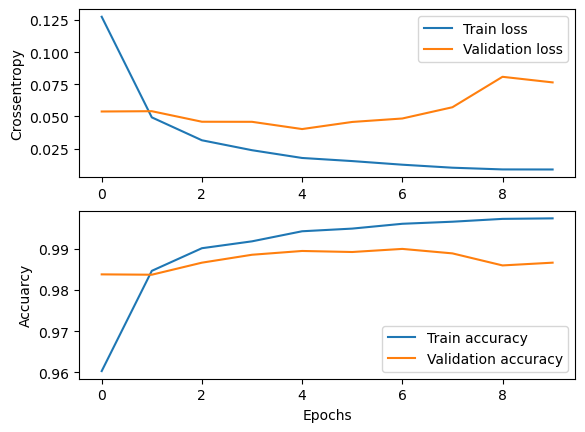

In [7]:
fig, axes = plt.subplots(2,1)

axes[0].plot(history.history['loss'], label='Train loss')
axes[0].plot(history.history['val_loss'], label='Validation loss')
axes[0].set_ylabel('Crossentropy')
axes[0].legend()

axes[1].plot(history.history['accuracy'], label='Train accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation accuracy')
axes[1].set_ylabel('Accuarcy')
axes[1].legend()
axes[1].set_xlabel('Epochs')

fig.show()

In [8]:
result= model.evaluate(test_x, test_y, verbose=2)

print('Test loss : {:.4f}\t Test accuracy : {:.2f}%'.format(result[0], result[1]*100))

10000/10000 - 1s - loss: 0.0622 - accuracy: 0.9887
Test loss : 0.0622	 Test accuracy : 98.87%


Probabilty is [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


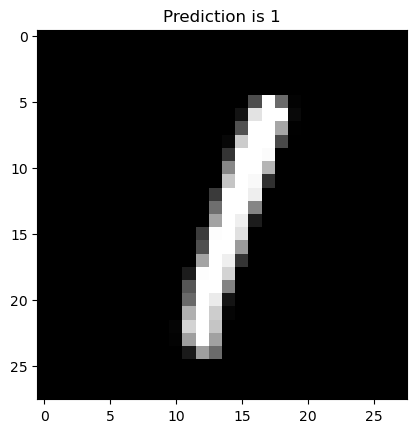

In [14]:
prediction = model.predict(test_x)
plt.imshow(test_x[5], 'gray')
print('Probabilty is {}'.format(prediction[5].round()))
plt.title('Prediction is {}'.format(np.argmax(prediction[5])))
plt.show()

In [10]:
layers=model.layers
print(layers)

[<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000026437BB4FC8>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000002643FBB4D48>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002643FBD1E88>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000002643FBFA8C8>, <tensorflow.python.keras.layers.core.Flatten object at 0x000002643FBFAC48>, <tensorflow.python.keras.layers.core.Dense object at 0x000002643FBFFA88>, <tensorflow.python.keras.layers.core.Dense object at 0x000002643FBFFB08>]


In [11]:
layers[0].get_weights()[0]

array([[[[-0.07872837, -0.0245933 , -0.28691864,  0.04765219,
          -0.01679886,  0.1258864 ,  0.24269848, -0.34356853,
          -0.10961913,  0.06402831,  0.04967889,  0.26161945,
          -0.0010238 ,  0.2940646 , -0.01329563,  0.12178271,
          -0.10307635, -0.07437774,  0.06296423,  0.04919953,
          -0.44196275, -0.20277405, -0.5164128 ,  0.0730148 ]],

        [[ 0.12978283, -0.4264351 ,  0.16695246, -0.02509441,
           0.12016578, -0.21056315,  0.29768336, -0.17219095,
          -0.07765643,  0.30190653, -0.50898486,  0.07406391,
          -0.01484498,  0.21614918, -0.08644181,  0.08823876,
           0.07318288, -0.05072653,  0.13636129,  0.02412087,
           0.0276402 ,  0.02822281, -0.5822885 , -0.45617867]],

        [[ 0.05119055, -0.34899792,  0.1097377 , -0.34108928,
           0.04000641, -0.4611056 ,  0.2486277 ,  0.2616622 ,
           0.2439463 ,  0.2541419 , -0.03776965, -0.16340847,
          -0.02303845,  0.01297841, -0.37317216, -0.00671734,
  

In [12]:
print('======weight & bias======')
print('Con2D-1 : {} {}'.format(layers[0].get_weights()[0].shape,\
                               layers[0].get_weights()[1].shape))
print('trainable parameters : {}'.format(np.prod(layers[0].get_weights()[0].shape)\
                                         +np.sum(layers[0].get_weights()[1].shape)))
print('Con2D-2 : {} {}'.format(layers[2].get_weights()[0].shape,\
                               layers[2].get_weights()[1].shape))
print('trainable parameters : {}'.format(np.prod(layers[2].get_weights()[0].shape)\
                                         +np.sum(layers[2].get_weights()[1].shape)))
print('Dense-1 : {} {}'.format(layers[5].get_weights()[0].shape,\
                               layers[5].get_weights()[1].shape))
print('trainable parameters : {}'.format(np.prod(layers[5].get_weights()[0].shape)\
                                         +np.sum(layers[5].get_weights()[1].shape)))
print('Dense-2 : {} {}'.format(layers[6].get_weights()[0].shape,\
                               model.layers[6].get_weights()[1].shape))
print('trainable parameters : {}'.format(np.prod(layers[6].get_weights()[0].shape)\
                                         +np.sum(layers[6].get_weights()[1].shape)))

======weight & bias======
Con2D-1 : (3, 3, 1, 24) (24,)
trainable parameters : 240
Con2D-2 : (3, 3, 24, 36) (36,)
trainable parameters : 7812
Dense-1 : (900, 128) (128,)
trainable parameters : 115328
Dense-2 : (128, 10) (10,)
trainable parameters : 1290


In [13]:
x = tf.random.uniform(shape=(1,28,28,1))
for layer in model.layers:
    x=layer(x)
    print(layer.__class__.__name__, 'output shape:\t',x.shape)

Conv2D output shape:	 (1, 26, 26, 24)
MaxPooling2D output shape:	 (1, 13, 13, 24)
Conv2D output shape:	 (1, 11, 11, 36)
MaxPooling2D output shape:	 (1, 5, 5, 36)
Flatten output shape:	 (1, 900)
Dense output shape:	 (1, 128)
Dense output shape:	 (1, 10)
